# Task 4: Personal EDA - Noah

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.functions_libs import *

%matplotlib inline

In [3]:
# Initial dataframe import

df = process_data('../../data/raw/adult.data')
df.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Native Country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [87]:
# Initial dataframe visualization

print("Number of rows, columns: {}".format(df.shape))

Number of rows, columns: (32561, 15)


In [88]:
# Viewing numerical column data basic statistics

pd.options.display.float_format = "{:.1f}".format
df.describe()

,Age,Final Weight,Education Num,Capital Gain,Capital Loss,Hours per Week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.6,189778.4,10.1,1077.6,87.3,40.4
std,13.6,105550.0,2.6,7385.3,403.0,12.3
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


In [89]:
# Number of unique values for each column

df.nunique(axis=0)

Age                  73
Workclass             9
Final Weight      21648
Education            16
Education Num        16
Marital Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital Gain        119
Capital Loss         92
Hours per Week       94
Native Country       42
Salary                2
dtype: int64

In [9]:
# Looking at some of the columns unique variables

print("Education uniques: \n{}\n".format(df.Education.unique()))
print("Relationship uniques: \n{}\n".format(df.Relationship.unique()))
print("Occupation uniques: \n{}".format(df.Occupation.unique()))

Education uniques: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Relationship uniques: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Occupation uniques: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [112]:
# Setting theme

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_theme(font_scale=1.3)

plt.rc("axes.spines", top=False, right=False)

In [113]:
df.dtypes

Age                int64
Workclass         object
Final Weight       int64
Education         object
Education Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per Week     int64
Native Country    object
Salary            object
dtype: object

Text(0.5, 1.0, 'Salary of Different Aged Adults')

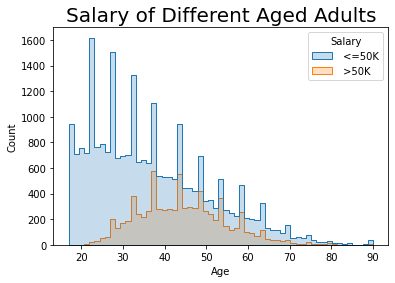

In [7]:
# Histogram of age and salary distribution. This shows that the majority of people have <=50K salaries,
# and those that do make >50K are generally older population. Data has outliers and needs more cleaning.

sns.histplot(
    df,
    x="Age",
    hue="Salary",
    element="step",
    common_norm=False,
)
plt.title("Salary of Different Aged Adults", size=20)

Text(0.5, 1.0, 'Adult Salary by Workclass')

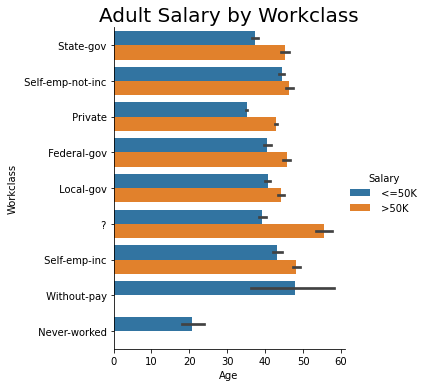

In [8]:
# Grouped bar chart of salaries counts grouped by workclass. This plot's groups are cleaned up and replotted later in the EDA.

sns.catplot(
    x="Age",
    y="Workclass",
    hue="Salary",
    kind="bar",
    data=df
    )
plt.title("Adult Salary by Workclass", size=20)

Text(0.5, 1.0, 'Salary of Different Education Levels')

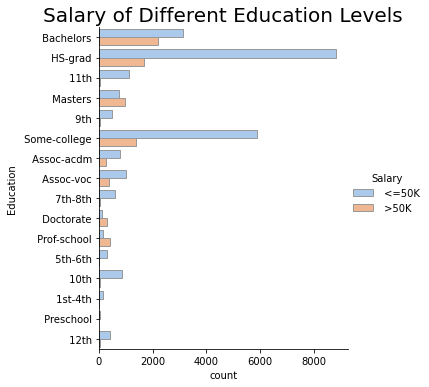

In [11]:
# Grouped bar chart of the salaries of people in each level of education. Some grouping of variables
# would be useful for 'Education Level', such as a group of all highschool grades.

sns.catplot(
    y="Education",
    hue="Salary",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=df
)
plt.title("Salary of Different Education Levels", size=20)

## **Task 5 Personal Work**

#### RQ: Does Classification Play a Major Role In Determining The Annual Income Of An Adult Worker?


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scripts.functions_libs import *

%matplotlib inline

In [14]:
df = process_data('../../data/raw/adult.data')
df.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Native Country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [15]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
# Grouping some education levels that can be categorized together

find_and_replace(df, 'Education', '11th|9th|7th-8th|5th-6th|10th|1st-4th|12th|Preschool|Replaced', 'Didnt-grad-HS')
find_and_replace(df, 'Education', 'Some-college', 'Bachelors')



# df['Education'] = df['Education'].str.replace('11th|9th|7th-8th|5th-6th|10th|1st-4th|12th|Preschool|Replaced', 'Didnt-Grad-HS', regex=True)
# df['Education'] = df['Education'].str.replace('Some-college','Bachelors',regex=False)

In [17]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' Didnt-grad-HS', ' Masters',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school'],
      dtype=object)

Text(0.5, 1.0, 'Salary of Different Education Levels')

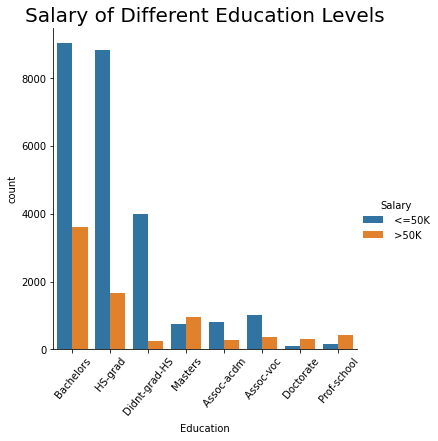

In [18]:
# Grouped bar chart of Education with salary

sns.catplot(
    x="Education",
    hue="Salary",
    kind="count",
    data=df
    ).set_xticklabels(rotation=50)
plt.title("Salary of Different Education Levels", size=20)

In [19]:
df.Workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
# Grouping like workclasses for visulaization purposes

find_and_replace(df, 'Workclass', 'State-gov|Federal-gov|Local-gov', 'Government')
find_and_replace(df, 'Workclass', 'Never-worked|Without-pay|Other', '?')
find_and_replace(df, 'Workclass', 'Self-emp-not-inc|Self-emp-inc', 'Self-employed')
find_and_replace(df, 'Workclass', '?', 'Other')

# df['Workclass'] = df['Workclass'].str.replace('State-gov|Federal-gov|Local-gov', 'Government', regex=True)
# df['Workclass'] = df['Workclass'].str.replace('Never-worked|Without-pay|Other', '?', regex=True)
# df['Workclass'] = df['Workclass'].str.replace('Self-emp-not-inc|Self-emp-inc', 'Self-employed', regex=True)
# df['Workclass'] = df['Workclass'].str.replace('?', 'Other', regex=False)

In [21]:
df.Workclass.unique()

array([' Government', ' Self-employed', ' Private', ' Other'],
      dtype=object)

Text(0.5, 1.0, 'Adult Salary by Workclass')

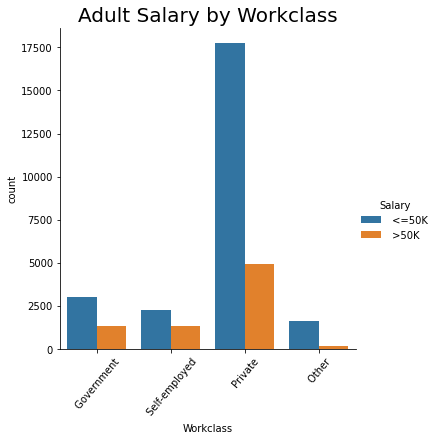

In [23]:
sns.catplot(
    x="Workclass",
    hue="Salary",
    kind="count",
    data=df,
    ).set_xticklabels(rotation=50)
plt.title("Adult Salary by Workclass", size=20)

Text(0.5, 1.0, 'Adult Salary Depending On Hours Worked per Week')

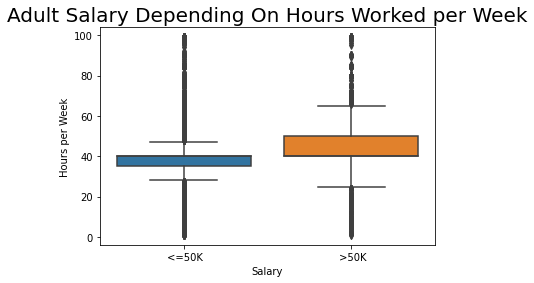

In [25]:
# Salary classification with hours worked per week

sns.boxplot(x='Salary', y='Hours per Week', data=df)
plt.title("Adult Salary Depending On Hours Worked per Week", size=20)

In [26]:
df.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
find_and_replace(df, 'Occupation', '?', 'Other')
find_and_replace(df, 'Occupation', 'Other-service', 'Other')

In [28]:
df.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Text(0.5, 1.0, 'Salary of Different Occupations')

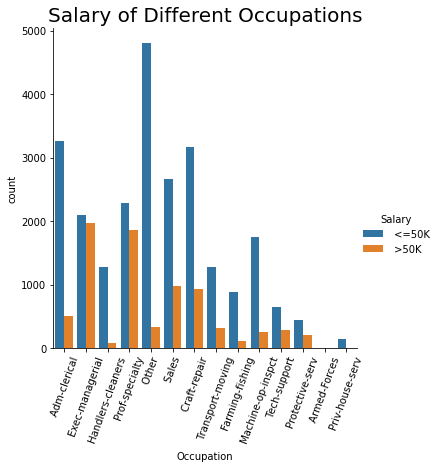

In [30]:
sns.catplot(
    x="Occupation",
    hue="Salary",
    kind="count",
    data=df,
    ).set_xticklabels(rotation=70)
plt.title("Salary of Different Occupations", size=20)